# firat of all i import python liberaries and data as well

In [ ]:
# firat of all i import python liberaries and data as well

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df=pd.read_csv(r"C:\Users\ajit\Downloads\archive\Sample - Superstore.csv" ,encoding="latin-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


 # NOW LET'S DO DATA CLEANING

In [60]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [61]:
#first remove columns that are not important for us for data analytics
df.drop(columns=["Row ID","Country","Customer ID","Order ID","Ship Date"],inplace=True)

In [62]:
df.columns

Index(['Order Date', 'Ship Mode', 'Customer Name', 'Segment', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [63]:
#now se some information about our data set
df.shape

(9994, 16)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     9994 non-null   object 
 1   Ship Mode      9994 non-null   object 
 2   Customer Name  9994 non-null   object 
 3   Segment        9994 non-null   object 
 4   City           9994 non-null   object 
 5   State          9994 non-null   object 
 6   Postal Code    9994 non-null   int64  
 7   Region         9994 non-null   object 
 8   Product ID     9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(2), object(11)
memory usage: 1.2+ MB


In [65]:
df.describe()
#it only works on column having numerical values

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [66]:
# lets see columns having missing values
df.isnull().sum()

Order Date       0
Ship Mode        0
Customer Name    0
Segment          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#   So, our data not have any misssing value if found:
#   1.I fill categorical column null values with mode
#   2.I fill numerical column null values with mean using fillna() method

In [67]:
# now remove duplicate rows if any
df.drop_duplicates(inplace=True)

In [68]:
# Next we have to manage date format of Order Date column-->it has not regular format in some rows
df['Order Date']=pd.to_datetime(df['Order Date'])

# our object columns have proper string/names otherwise i make them proper

In [69]:
# now add a new column 
df['Profit Margin(%)']=(df['Profit']/df['Sales'])*100

In [70]:
df.head(3)

,Order Date,Ship Mode,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin(%)
0,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,16.0
1,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,30.0
2,2016-06-12,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,47.0


In [71]:
#now import this clean data for Excel and Power Bi 
df.to_excel('Cleaned_data_retail_sales.xlsx')

# EXPLORATORY DATA ANALYSIS 

In [72]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [73]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [74]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [43]:
# lets make plots via some questions:
# 1. what products are top selling?
# 2.which regions or segments are most profitable?
# 3.relationship bw profit and discount
# 4.top category for sales
# 5.which customer segment make most revenue?


In [75]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

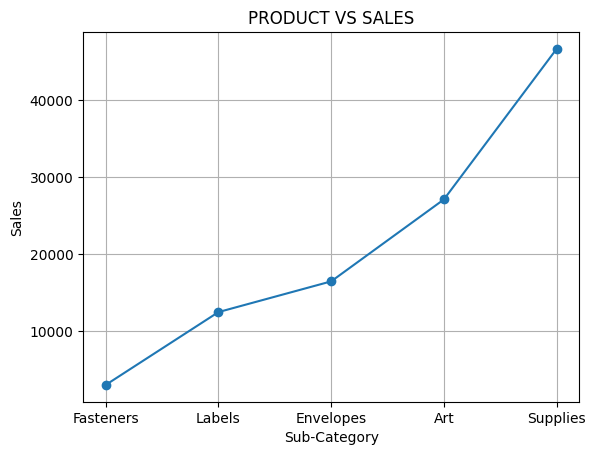

In [76]:
#1.
total_sales=df.groupby('Sub-Category')['Sales'].sum().sort_values().head(5)
x=total_sales.index
y=total_sales.values
plt.plot(x,y,label='Sales',marker='o')
plt.title("PRODUCT VS SALES")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.grid()
plt.show()

In [77]:
#2.
most_profit=df.groupby('Region')['Profit'].sum()
most_profit

Region
Central     39706.3625
East        91534.8388
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

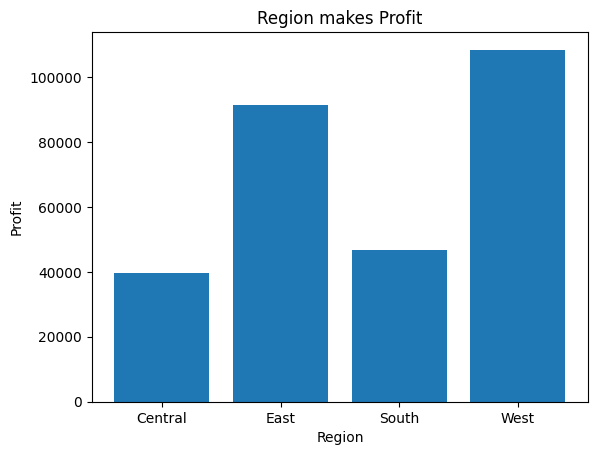

In [78]:
plt.bar(most_profit.index,most_profit.values)
plt.title("Region makes Profit")
plt.xlabel("Region")
plt.ylabel('Profit')
plt.show()

In [49]:
#Observation:West region gives maximum profit followed by East

<Axes: xlabel='Profit', ylabel='Discount'>

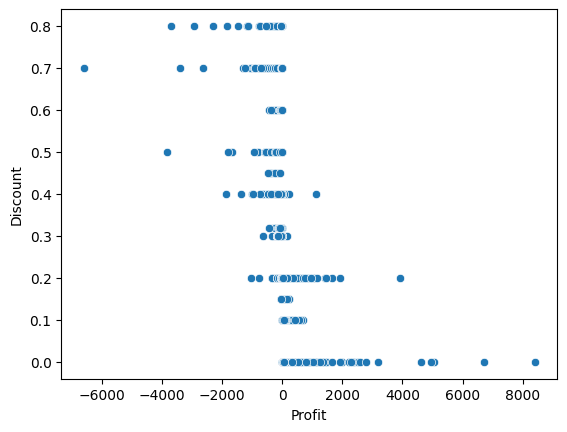

In [79]:
#3.
sns.scatterplot(x='Profit',y='Discount',data=df)

In [51]:
#Observation: as discount is increased profit also increases but upto a certain extant

In [80]:
#4.
top_category=df.groupby('Category')['Sales'].sum()
top_category

Category
Furniture          741718.4233
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

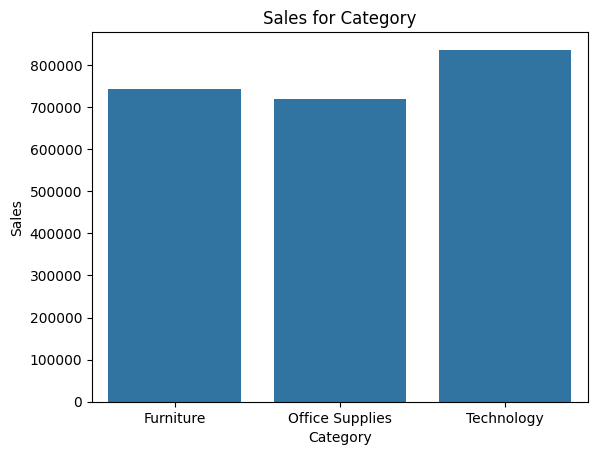

In [81]:

sns.barplot(data=top_category)
plt.title("Sales for Category")
plt.xlabel("Category")
plt.ylabel('Sales')
plt.show()

In [54]:
#Observation:Technology category gives highest revenue

In [82]:
#5.
cust_seg=df.groupby('Segment')['Sales'].sum().sort_values()
cust_seg

Segment
Home Office    4.293718e+05
Corporate      7.061464e+05
Consumer       1.161401e+06
Name: Sales, dtype: float64

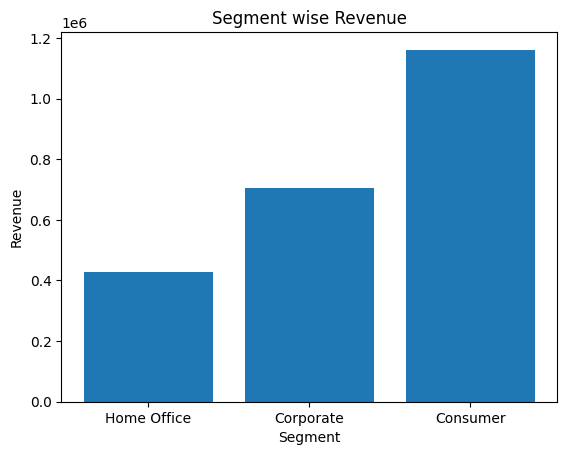

In [83]:
plt.bar(cust_seg.index,cust_seg.values)
plt.title("Segment wise Revenue")
plt.xlabel("Segment")
plt.ylabel('Revenue')
plt.show()

In [57]:
#Observation: consumer segment gives maximum revenue